In [1]:
import pandas as pd
import numpy as np
from natsort import natsorted
import math

-----

1. Importing the sql conenction script.
2. Connecting to the sql database.
3. Importing the required tables.

In [ ]:
run_TrimerSQL = False
if run_TrimerSQL:
    import scripts.TrimerSQL as sql

    info_list = []

    sql_conn = sql.mysql(input_host = info_list[0],
                         input_port = info_list[1],
                         input_username = info_list[2],
                         input_password = info_list[3],
                         input_database = info_list[4])
    
    sql_conn.import_tables()

----

1. Creating trimer object from the sql imported datasets.
2. Processing the raw datasets into trimers dataframes used for futrher processing.

In [ ]:
run_TrimerCreate = True
if run_TrimerCreate:
    import scripts.TrimerCreate as trimer

    trim_obj = trimer.Trimer(seqs_loc="raw_tables\\covid_vaccine_new.sequences.csv",
                                     seq_collapsed_loc="raw_tables\\covid_vaccine_new.sequence_collapse.csv", 
                                     metadata_loc="raw_tables\\covid_vaccine_new.sample_metadata.csv",
                                     metadata_list=["cell_subset", "collection_time_point_relative"],
                                     rename_metadata=True,
                                     new_metadata_names=["ab_target", "time_point"]
                                     )
    
    source_options = ["germline", "top_seq", "all_seq"][1]
    triemrs = trim_obj.create(subdatasets_list=["ab_target","time_point","subject_id"], source=source_options, save_csv=True)

----

1. Creating trimer LPA object based on the LPA latent domain analysis (based on trimers signatures between documents).
2. Caclulating PCA componenets.
3. Plotting scatterplot of the LPA anaylsis.
4. Plotting heatmap of the LPA results.

In [ ]:
run_TrimerLPA = True
if run_TrimerLPA:
    import scripts.TrimerLPA as trLPA

    input_dataset = "ab_target-time_point-subject_id-top_seq-trimers_[25.09.25-12;09].csv"
    raw_trimer = pd.read_csv(f"trimers_data\\{input_dataset}", index_col=0)

    trimer_lpa = trLPA.TrimerLPA(input_data=f"trimers_data\\{input_dataset}", min_treshold=100) #creating trimer LPA object
    pca, var = trimer_lpa.pca() # doing PCA analysis

> The following document havn't met the treshold (100):
                  document  frequency_in_document
19  Spike+MemB.1baseline.7                      2
24     Spike+MemB.2weeks.7                     41
26     Spike+MemB.4weeks.4                     62


In [ ]:
# Plotting heatmap of the LPA distances
trimer_lpa.plot_heatmap(trimers_origin="top_seq")

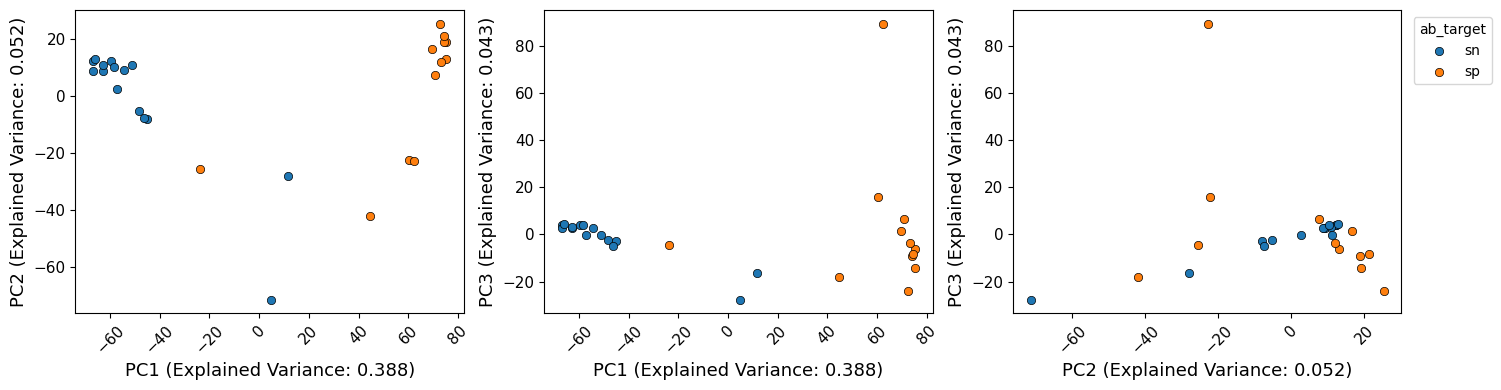

In [16]:
import matplotlib.pyplot as plt
var_list = [round(i,3) for i in var.Variance.values]

pca1_df = pca
pca1_df.columns = [f"PC{i}" for i in range(1,pca1_df.shape[1]+1)]

# unique ab_target types

index_i = 0
values = pca1_df.index.str.split(".").to_series().apply(lambda x : x[index_i]).unique()

fig, axs = plt.subplots(1,3, figsize=(15,4))

for ab in values:
    cond_slice = (pca1_df.index.str.split(".").to_series().apply(lambda x : x[index_i]) == ab).values
    dataset_slice = pca1_df[cond_slice]

    PCs = ["PC"+str(i) for i in range(1,4)]
    for i,j in zip([0,1,2],[[1,2],[1,3],[2,3]]):
        PCi = f"PC{j[0]}"
        PCj = f"PC{j[1]}"

        axs[i].scatter(dataset_slice[PCi], 
                       dataset_slice[PCj], 
                       label=ab,
                       edgecolor="black",
                       lw=0.5)

        axs[i].tick_params(axis="both", labelsize=11)
        axs[i].tick_params(axis="x", rotation=45)
        axs[i].set_xlabel(PCi + f" (Explained Variance: {str(var_list[j[0]-1])})", fontsize=13)
        axs[i].set_ylabel(PCj + f" (Explained Variance: {str(var_list[j[1]-1])})", fontsize=13)
    
plt.legend(labels=["sn", "sp"], title="ab_target",loc="upper right", bbox_to_anchor=(1.25, 1) )

plt.tight_layout()
plt.show()

---

In [ ]:
run_TrimerAnalyze = True
if run_TrimerAnalyze:
    import scripts.TrimerAnalyze as trSD

    input_path = "trimers_output\\ab_target-time_point-subject_id-top_seq-trimers_[10.05.25-20;02].csv"

    trimerA = trSD.TrimerAnalysis(trimer_input=input_path)
    trimer_analysis = trimerA.position_analysis()
    trimerA.plot_positions(label_index=0, sep=True)

In [ ]:
import pandas as pd
seqs = pd.read_csv("trimers_raw_tables\\covid_vaccine_new.sequences.csv")

In [ ]:
input_dataset = "trimers_output\\ab_target-time_point-subject_id-top_seq-trimers_[10.05.25-20;02].csv"
ipt = pd.read_csv(input_dataset)